In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
mydata = datasets.load_iris()

In [2]:
mydata.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [3]:
X = mydata.data
y = mydata.target

In [4]:
# 为方便可视化，只取鸢尾花的前两个种类，每类样本的前两个特征
X = X[y<2, :2]
y = y[y<2]

In [5]:
X.shape

(100, 2)

表示现在我们的数据共有100个样本，每个样本有两个特征。

In [6]:
y.shape

(100,)

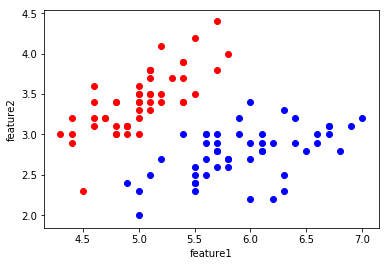

In [7]:
# 样本可视化
plt.scatter(X[y==0, 0], X[y==0, 1], color = 'r')
plt.scatter(X[y==1, 0], X[y==1, 1], color = 'b')
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.show()

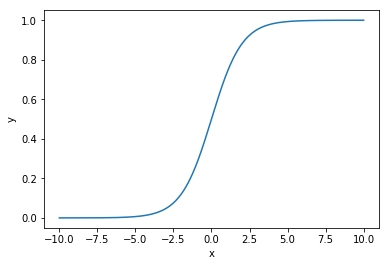

In [8]:
# 编写 sigmoid 函数

def sigmoid(t):
    return 1 / (1 + np.exp(-t))
x1 = np.linspace(-10, 10, 500)
y1 = sigmoid(x1)
plt.plot(x1, y1)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# 一, 用逻辑回归对上述的两类鸢尾花分类

In [9]:
from ML.model_selection import train_test_split
from ML.LogisticRegression import LogisticRegression
X_train,X_test,y_train,y_test = train_test_split(X, y, seed = 666)
logisticReg = LogisticRegression()
logisticReg.fit_gd(X_train, y_train)
logisticReg.score(X_test,y_test)

1.0

In [10]:
logisticReg.predict_prob(X_test)

array([0.92972035, 0.98664939, 0.14852024, 0.17601199, 0.0369836 ,
       0.0186637 , 0.04936918, 0.99669244, 0.97993941, 0.74524655,
       0.04473194, 0.00339285, 0.26131273, 0.0369836 , 0.84192923,
       0.79892262, 0.82890209, 0.32358166, 0.06535323, 0.20735334])

In [11]:
logisticReg.predict(X_test)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [12]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

可以看到，用逻辑回归对两类鸢尾花分类，准确率为1。

# 二, 决策边界

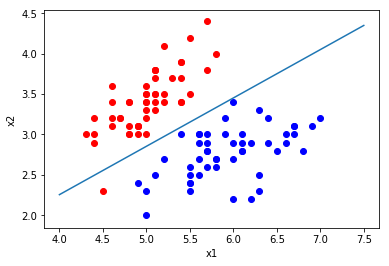

In [13]:
def x2(x1):
    return (-logisticReg._theta[0] - logisticReg._theta[1]*x1)/logisticReg._theta[2]

x1_plot = np.linspace(4, 7.5, 1000)
x2_plot = x2(x1_plot)
plt.scatter(X[y==0, 0], X[y==0, 1], color = 'r')
plt.scatter(X[y==1, 0], X[y==1, 1], color = 'b')
plt.xlabel("x1")
plt.ylabel("x2")
plt.plot(x1_plot, x2_plot)
plt.show()

预测结果的准确率不是1吗？ 为什么上图中还有一个点被分错了呢？   
这是因为，此点可能是在训练数据中，而不是在测试数据中。   
下面用测试数据 再来验证一下   

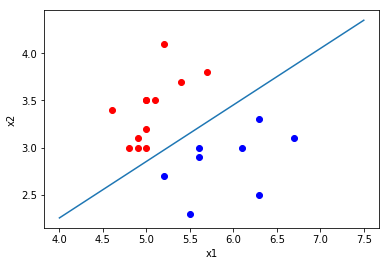

In [14]:
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], color = 'r')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], color = 'b')
plt.xlabel("x1")
plt.ylabel("x2")
plt.plot(x1_plot, x2_plot)
plt.show()

这样，决策边界是不是完全正确将数据分为了两类？


# 不规则的决策边界的绘制

注意： 规则的决策边界也可以用不规则的决策边界的绘制方法， 反之则不成立

In [19]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)),
        np.linspace(axis[3], axis[2], int((axis[3]-axis[2])*100))
    )
    x_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(x_new)
    ss = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, ss, linewidth=5, cmap=custom_cmap)

逻辑回归利用plot_decision_boundary 绘制决策边界。

/home/crystal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


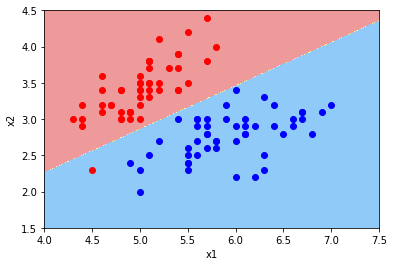

In [22]:

plot_decision_boundary(logisticReg, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0, 1], color = 'r')
plt.scatter(X[y==1, 0], X[y==1, 1], color = 'b')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


Knn 利用plot_decision_boundary 绘制决策边界。

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knnClf = KNeighborsClassifier()
knnClf.fit(X_train, y_train)
knnClf.score(X_test, y_test)

1.0

/home/crystal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


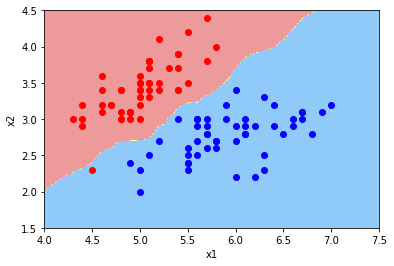

In [25]:
plot_decision_boundary(knnClf, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0, 1], color = 'r')
plt.scatter(X[y==1, 0], X[y==1, 1], color = 'b')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


可以看到，同样的数据，用不同的分类算法，得出的决策边界也不同。

不规则决策边界的绘制，同样适用与多分类问题，而knn天生能解决多分类问题。

In [27]:
knnClf1 = KNeighborsClassifier()
knnClf1.fit(mydata.data[:,:2], mydata.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

/home/crystal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


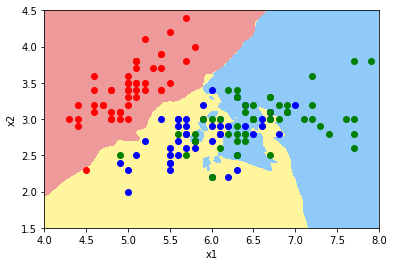

In [30]:
plot_decision_boundary(knnClf1, axis=[4, 8, 1.5, 4.5])
X1 = mydata.data[:,:2]
y1 = mydata.target
plt.scatter(X1[y1==0, 0], X1[y1==0, 1], color = 'r')
plt.scatter(X1[y1==1, 0], X1[y1==1, 1], color = 'b')
plt.scatter(X1[y1==2, 0], X1[y1==2, 1], color = 'g')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

可以看出，上图的决策边界太过曲折，可以得出该模型过拟合，即模型的复杂度太高了。   
在KNN算法中，K越小，模型的复杂度越高。   
knnlf1中我们使用默认的n_neighbors=5,现在，我们现在令n_neighbors = 20    


In [31]:
knnClf2 = KNeighborsClassifier(n_neighbors = 20)
knnClf2.fit(mydata.data[:,:2], mydata.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

/home/crystal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


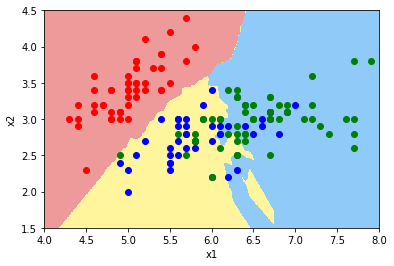

In [32]:
plot_decision_boundary(knnClf2, axis=[4, 8, 1.5, 4.5])
X1 = mydata.data[:,:2]
y1 = mydata.target
plt.scatter(X1[y1==0, 0], X1[y1==0, 1], color = 'r')
plt.scatter(X1[y1==1, 0], X1[y1==1, 1], color = 'b')
plt.scatter(X1[y1==2, 0], X1[y1==2, 1], color = 'g')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

决策边界是不是平滑了一些，但好像还是不够理想   
knn算法中，令n_neighbors = 30

In [33]:
knnClf3 = KNeighborsClassifier(n_neighbors = 30)
knnClf3.fit(mydata.data[:,:2], mydata.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform')

/home/crystal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


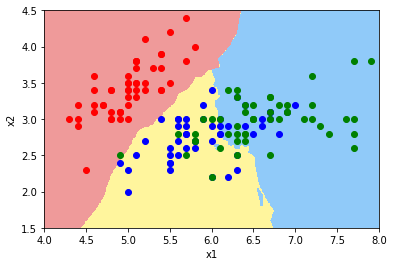

In [34]:
plot_decision_boundary(knnClf3, axis=[4, 8, 1.5, 4.5])
X1 = mydata.data[:,:2]
y1 = mydata.target
plt.scatter(X1[y1==0, 0], X1[y1==0, 1], color = 'r')
plt.scatter(X1[y1==1, 0], X1[y1==1, 1], color = 'b')
plt.scatter(X1[y1==2, 0], X1[y1==2, 1], color = 'g')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

这样，是不是好了很多